In [1]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices

In [3]:
df = pd.read_csv('SBIN.NS.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-10,493.350006,504.950012,492.500000,503.649994,495.910736,15832274
1,2022-01-11,503.000000,507.799988,499.250000,505.950012,498.175415,16107950
2,2022-01-12,509.899994,513.500000,508.500000,510.250000,502.409332,14489616
3,2022-01-13,510.000000,512.849976,507.000000,511.350006,503.492432,10450974
4,2022-01-14,509.000000,510.350006,505.149994,508.350006,500.538544,8724574


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,525.035400,530.860801,519.263600,525.053400,522.272294,1.484001e+07
std,50.482591,50.068193,50.346553,50.124251,51.718377,7.397333e+06
min,438.000000,442.100006,425.000000,434.700012,433.534210,3.692065e+06
25%,485.400002,491.599998,481.374992,486.562500,483.073585,1.001845e+07
50%,517.950012,523.250000,512.324982,517.750000,515.128235,1.296502e+07
75%,560.525009,567.449997,553.199997,561.562485,561.562485,1.692078e+07
max,625.549988,629.549988,617.500000,625.500000,625.500000,6.140301e+07


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df_copy = df.copy()

In [13]:
df_copy.drop('Date',axis=1,inplace=True)
df_copy.head()

,Open,High,Low,Close,Adj Close,Volume
0,493.350006,504.950012,492.500000,503.649994,495.910736,15832274
1,503.000000,507.799988,499.250000,505.950012,498.175415,16107950
2,509.899994,513.500000,508.500000,510.250000,502.409332,14489616
3,510.000000,512.849976,507.000000,511.350006,503.492432,10450974
4,509.000000,510.350006,505.149994,508.350006,500.538544,8724574


<AxesSubplot:>

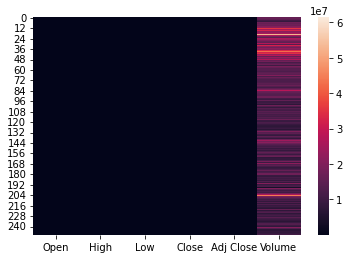

In [14]:
import seaborn as sns
sns.heatmap(df_copy)

In [28]:
y, X = dmatrices('Volume ~ High + Low + Close', data=df, return_type='dataframe')

In [29]:
y[:3]

,Volume
0,15832274.0
1,16107950.0
2,14489616.0


In [30]:
X[:3]

,Intercept,High,Low,Close
0,1.0,504.950012,492.50,503.649994
1,1.0,507.799988,499.25,505.950012
2,1.0,513.500000,508.50,510.250000


In [31]:
mod = sm.OLS(y, X)  ## Describe model
res = mod.fit()     # Fit model
print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     55.63
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           1.74e-27
Time:                        23:26:43   Log-Likelihood:                -4243.7
No. Observations:                 250   AIC:                             8495.
Df Residuals:                     246   BIC:                             8509.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.138e+07   3.96e+06      5.396      0.0

In [32]:
res.params

Intercept    2.137813e+07
High         8.301630e+05
Low         -8.387774e+05
Close       -2.226928e+04
dtype: float64

In [33]:
sm.stats.linear_rainbow(res)

(2.245144484725503, 5.260889217930643e-06)

eval_env: 1


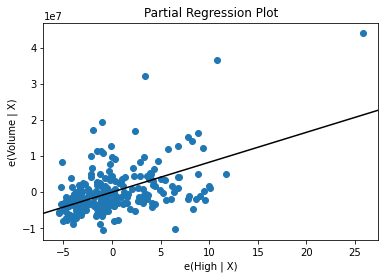

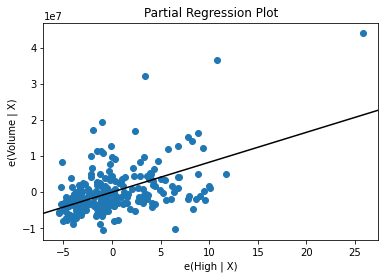

In [34]:
sm.graphics.plot_partregress('Volume', 'High', ['Low', 'Close'],data=df, obs_labels=False)